# Analysis of AirBNB data from Boston
In this analysis, Boston AirBNB data from the listings.csv file downloaded from https://www.kaggle.com/airbnb/boston/data is analyzed according to the CRISP-DM process to answer some questions, mainly relevant for people offereing their accommendations.

## 1. Business understanding
AirBNB is a community based platform in which users can offer their private accommendations to other people. So the platform acts as a kind of broker. Users can earn money by renting their couch, their room, their flats or even a complete houses. Its is assumed that one reason to book a specific accommendation is - beside location, price, and amenities - the rating by other users. Here is is analyzed whether there are aspects that users can influence that are  corrolated with a high rating.

1. Is there a relation between between higher availablity and number of ratings?
2. Is there a relation between costs and ratings and between locations and ratings?
3. Is there a relation between amenities and rating?
4. Is there a relation between the number of reviews and the rating? In other words: Is the distribution of ratings skewed?
5. Is there a way to predict the rating based on the set of amentites?

## 2. Data understanding
The data is loaded and a number of things are checked to understand the dataset.

In [98]:
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


### Determine the number of rows (entries for specifc accommendations) and columns (different features of the accommendations)

In [76]:
num_rows = df.shape[0] #Contains the number of rows in the dataset
num_cols = df.shape[1] #Contains the number of columns in the dataset

print('The dataset contains', num_rows, 'rows and', num_cols, 'columns.')

The dataset contains 3585 rows and 95 columns.


### Check of the columns to find out which are important for this analysis and check their status
The dataset contains many full text columns. They will not be considered here. It is assumed that neighborhood (the cleansed version), the property type, the room type, the accommodates, the bed type, the amenities, the price, the availability, the number of reviews, and of course the rating score itself play a role to answer the business questions above.

In [176]:
df.groupby('neighbourhood_cleansed').mean()['review_scores_rating'].sort_values(ascending=False)

neighbourhood_cleansed
Leather District           98.333333
Roslindale                 95.380000
West Roxbury               95.212121
South Boston Waterfront    94.431034
Jamaica Plain              94.159322
Longwood Medical Area      94.000000
South Boston               93.980392
North End                  93.725000
Charlestown                93.697368
Beacon Hill                93.378698
South End                  93.264925
Bay Village                93.000000
Downtown                   92.432203
Hyde Park                  92.280000
Chinatown                  92.121951
Back Bay                   91.531646
Mattapan                   91.000000
Brighton                   90.864662
West End                   90.333333
East Boston                90.272059
Allston                    90.164835
Roxbury                    89.803419
Fenway                     89.417112
Dorchester                 89.280000
Mission Hill               87.695122
Name: review_scores_rating, dtype: float64

In [77]:
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'host_total_listings_count', 'extra_people', 'minimum_nights', 'experiences_offered', 'host_thumbnail_url', 'calendar_updated', 'country_code', 'require_guest_phone_verification', 'host_url', 'longitude', 'host_is_superhost', 'guests_included', 'availability_30', 'listing_url', 'host_identity_verified', 'price', 'is_location_exact', 'host_listings_count', 'calculated_host_listings_count', 'state', 'availability_90', 'smart_location', 'maximum_nights', 'host_picture_url', 'room_type', 'id', 'latitude', 'host_since', 'bed_type', 'require_guest_profile_picture', 'instant_bookable', 'amenities', 'host_id', 'requires_license', 'last_scraped', 'street', 'accommodates', 'neighbourhood_cleansed', 'availability_60', 'cancellation_policy', 'host_name', 'availability_365', 'number_of_reviews', 'calendar_last_scraped', 'name', 'description', 'picture_url', 'host_verifications', 'country', 'scrape_id', 'host_has_profile_pic'}


In [78]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.5])
print(most_missing_cols)

{'has_availability', 'square_feet', 'notes', 'weekly_price', 'license', 'neighbourhood_group_cleansed', 'jurisdiction_names', 'security_deposit', 'monthly_price'}


In [79]:
neighbourhood=df['neighbourhood_cleansed'].value_counts()
print(neighbourhood)

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64


In [80]:
property_type=df['property_type'].value_counts()
print(property_type)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64


In [81]:
room_type=df['room_type'].value_counts()
print(room_type)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64


In [61]:
bed_type=df['bed_type'].value_counts()
print(bed_type)

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64


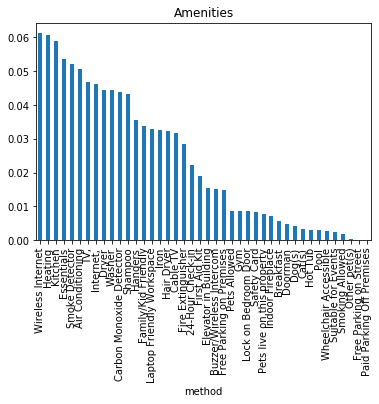

In [178]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of different types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

possible_vals = ["24-Hour Check-in", "Air Conditioning", "Breakfast", "Buzzer/Wireless Intercom", 
                 "Cable TV", "Carbon Monoxide Detector", "Cat(s)", "Dog(s)", "Doorman", ",Dryer",
                 "Elevator in Building", "Essentials", "Family/Kid Friendly", "Fire Extinguisher",
                 "First Aid Kit", "Free Parking on Premises", "Free Parking on Street", "Gym", "Hangers",
                 "Hair Dryer", "Heating", "Hot Tub", "Indoor Fireplace", "Internet,", "Iron", "Kitchen",
                 "Laptop Friendly Workspace", "Lock on Bedroom Door", "Other pet(s)", "Paid Parking Off Premises",
                 "Pets Allowed", "Pets live on this property", "Pool", "Safety Card", "Shampoo", "Smoke Detector",
                 "Smoking Allowed", "Suitable for Events", "TV,", "Washer", "Wheelchair Accessible",
                 "Wireless Internet"]

def clean_and_plot(df, title='Amenities', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['amenities'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

In [83]:
print(props_df)

                               count
method                              
Wireless Internet           0.139519
Heating                     0.138010
Kitchen                     0.133931
Smoke Detector              0.118719
Air Conditioning            0.115049
TV                          0.111134
Carbon Monoxide Detector    0.099592
Cable TV                    0.072186
Free Parking on Premises    0.033891
Pets Allowed                0.019821
Pets live on this property  0.017496
Other                       0.000653


In [152]:
df.maximum_nights.value_counts()

1125        2528
365          134
30           100
7             68
90            61
14            52
60            51
5             42
10            41
180           39
3             34
4             31
120           30
730           26
45            23
28            21
21            21
15            20
2             17
8             17
6             17
31            16
29            16
20            15
25            14
1             12
40             7
360            7
100            6
35             5
            ... 
1000           2
366            2
200            2
138            1
250            1
1500           1
363            1
99999999       1
1100           1
125            1
9999           1
18             1
400            1
270            1
87             1
85             1
130            1
38             1
42             1
19             1
160            1
62             1
70             1
80             1
84             1
2000           1
96             1
49            

## 3. Data preparation

In [153]:
df_prepared = df.copy() # Copy the original dataset into a new dataframe which is then step-by-step changed

### Correction of the price column
The price column contains unfortunately no number values but strings due to a leading "$" symbol and commas as 1000-seperators. Furthermore, the two decimal digits are always "0" and are, therefore, useless. Thus, these things are removed and the price is converted to int values. After that, the price distribution is plotted.

In [154]:
df_prepared['price'] = df_prepared['price'].map(lambda i: (i[1:])) # Remove leading "$"
df_prepared['price'] = df_prepared['price'].map(lambda i: (i[:-3])) # Remove decimal values (last 3 characters)
df_prepared['price'] = df_prepared['price'].map(lambda i: int(i.replace(",", ""))) # Remove commas and convert to int

Text(0, 0.5, 'Frequency')

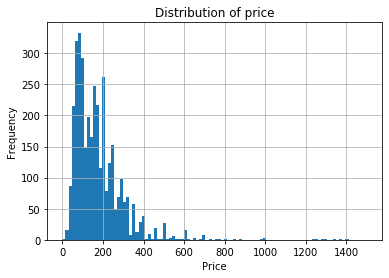

In [161]:
df_prepared['price'].hist(bins=100, range=(0, 1500))
plt.title("Distribution of price")
plt.xlabel('Price')
plt.ylabel('Frequency')

### Replacement of the amenities column by specific columns for each amenity
The amenities column is tricky, since it contains strings of all types of combinations of amenities. This is replaced by specific columns with boolean values.

In [156]:
df_prepared['24HourCheckin']          =df_prepared['amenities'].map(lambda i: "24-Hour Check-in" in i)
df_prepared['airConditioning']        =df_prepared['amenities'].map(lambda i: "Air Conditioning" in i)
df_prepared['breakfast']              =df_prepared['amenities'].map(lambda i: "Breakfast" in i)
df_prepared['buzzerWirelessIntercom'] =df_prepared['amenities'].map(lambda i: "Buzzer/Wireless Intercom" in i)
df_prepared['cableTV']                =df_prepared['amenities'].map(lambda i: "Cable TV" in i)
df_prepared['carbonMonoxideDetector'] =df_prepared['amenities'].map(lambda i: "Carbon Monoxide Detector" in i)
df_prepared['cats']                   =df_prepared['amenities'].map(lambda i: "Cat(s)" in i)
df_prepared['dogs']                   =df_prepared['amenities'].map(lambda i: "Dog(s)" in i)
df_prepared['doorman']                =df_prepared['amenities'].map(lambda i: "Doorman" in i)
df_prepared['dryer']                  =df_prepared['amenities'].map(lambda i: ",Dryer" in i) # Prohibits match in "Hair Dryer"
df_prepared['elevatorInBuilding']     =df_prepared['amenities'].map(lambda i: "Elevator in Building" in i)
df_prepared['essentials']             =df_prepared['amenities'].map(lambda i: "Essentials" in i)
df_prepared['familyKidFriendly']      =df_prepared['amenities'].map(lambda i: "Family/Kid Friendly" in i)
df_prepared['fireExtinguisher']       =df_prepared['amenities'].map(lambda i: "Fire Extinguisher" in i)
df_prepared['firstAidKit']            =df_prepared['amenities'].map(lambda i: "First Aid Kit" in i)
df_prepared['freeParkingOnPremises']  =df_prepared['amenities'].map(lambda i: "Free Parking on Premises" in i)
df_prepared['freeParkingOnStreet']    =df_prepared['amenities'].map(lambda i: "Free Parking on Street" in i)
df_prepared['gym']                    =df_prepared['amenities'].map(lambda i: "Gym" in i)
df_prepared['hangers']                =df_prepared['amenities'].map(lambda i: "Hangers" in i)
df_prepared['hairDryer']              =df_prepared['amenities'].map(lambda i: "Hair Dryer" in i)
df_prepared['heating']                =df_prepared['amenities'].map(lambda i: "Heating" in i)
df_prepared['hotTub']                 =df_prepared['amenities'].map(lambda i: "Hot Tub" in i)
df_prepared['indoorFireplace']        =df_prepared['amenities'].map(lambda i: "Indoor Fireplace" in i)
df_prepared['internet']               =df_prepared['amenities'].map(lambda i: "Internet," in i) # Prohibits match in "Cable TV"
df_prepared['iron']                   =df_prepared['amenities'].map(lambda i: "Iron" in i)
df_prepared['kitchen']                =df_prepared['amenities'].map(lambda i: "Kitchen" in i)
df_prepared['laptopFriendlyWorkspace']=df_prepared['amenities'].map(lambda i: "Laptop Friendly Workspace" in i)
df_prepared['lockOnBedroomDoor']      =df_prepared['amenities'].map(lambda i: "Lock on Bedroom Door" in i)
df_prepared['otherPets']              =df_prepared['amenities'].map(lambda i: "Other pet(s)" in i)
df_prepared['paidParkingOffPremises'] =df_prepared['amenities'].map(lambda i: "Paid Parking Off Premises" in i)
df_prepared['petsAllowed']            =df_prepared['amenities'].map(lambda i: "Pets Allowed" in i)
df_prepared['petsLiveOnThisProperty'] =df_prepared['amenities'].map(lambda i: "Pets live on this property" in i)
df_prepared['pool']                   =df_prepared['amenities'].map(lambda i: "Pool" in i)
df_prepared['safetyCard']             =df_prepared['amenities'].map(lambda i: "Safety Card" in i)
df_prepared['shampoo']                =df_prepared['amenities'].map(lambda i: "Shampoo" in i)
df_prepared['smokeDetector']          =df_prepared['amenities'].map(lambda i: "Smoke Detector" in i)
df_prepared['smokingAllowed']         =df_prepared['amenities'].map(lambda i: "Smoking Allowed" in i)
df_prepared['suitableForEvents']      =df_prepared['amenities'].map(lambda i: "Suitable for Events" in i)
df_prepared['tV']                     =df_prepared['amenities'].map(lambda i: "TV," in i) # Prohibits match in "Cable TV"
df_prepared['washer']                 =df_prepared['amenities'].map(lambda i: "Washer" in i)
df_prepared['wheelchairAccessible']   =df_prepared['amenities'].map(lambda i: "Wheelchair Accessible" in i)
df_prepared['wirelessInternet']       =df_prepared['amenities'].map(lambda i: "Wireless Internet" in i)

del df_prepared['amenities']


In [157]:
df_prepared.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,pool,safetyCard,shampoo,smokeDetector,smokingAllowed,suitableForEvents,tV,washer,wheelchairAccessible,wirelessInternet
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,False,False,True,True,False,False,True,True,False,True
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,False,False,True,True,False,False,True,True,False,True
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,False,True,True,True,False,False,True,True,False,True
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,False,True,True,True,False,False,True,True,False,True
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,False,False,True,True,False,False,False,False,False,True


In [128]:
df_prepared['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                          32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                               15
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                        